<a href="https://colab.research.google.com/github/2303a51863/NLP/blob/main/DISASTER_TWEETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT-DISASTER TWEETS(01-09-2025)

H.NO:2303a51863

Batch-13

In [25]:
import pandas as pd
import numpy as np
import re
import string
df=pd.read_csv("/content/sample_data/tweets.csv")
print(df)

          id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0

In [37]:
def preprocess_text(text):
  text=str(text).lower()
  text = text.translate(str.maketrans('','',string.punctuation))
  text = re.sub(r'[^a-z0-9\s]', '', text)
  tokens=word_tokenize(text)
  stop_words=set(stopwords.words("english"))
  tokens=[word for word in tokens if word not in stop_words]
  return " ".join(tokens)


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
df['text'] = df['text'].astype(str).apply(preprocess_text)
print(df['text'].head())

0    communal violence bhainsa telangana stones pel...
1    telangana section 144 imposed bhainsa january ...
2    arsonist sets cars ablaze dealership httpstcog...
3    arsonist sets cars ablaze dealership httpstco0...
4    lord jesus love brings freedom pardon fill hol...
Name: text, dtype: object


In [39]:
X = df["text"]
y = df["target"]
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    return acc, prec, rec, f1

results = {}


In [40]:
log_reg = LogisticRegression(max_iter=1000)
results["Logistic Regression"] = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
svm = SVC(kernel="linear")
results["SVM"] = evaluate_model(svm, X_train, X_test, y_train, y_test)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
results["Random Forest"] = evaluate_model(rf, X_train, X_test, y_train, y_test)
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T
print("\n=== Model Comparison ===")
print(results_df)


Model: LogisticRegression
Accuracy : 0.8641
Precision: 0.8562
Recall   : 0.3239
F1-score : 0.4700

Model: SVC
Accuracy : 0.8773
Precision: 0.7903
Recall   : 0.4634
F1-score : 0.5842

Model: RandomForestClassifier
Accuracy : 0.8777
Precision: 0.7736
Recall   : 0.4846
F1-score : 0.5959

=== Model Comparison ===
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.864116   0.856250  0.323877  0.469983
SVM                  0.877309   0.790323  0.463357  0.584203
Random Forest        0.877748   0.773585  0.484634  0.595930


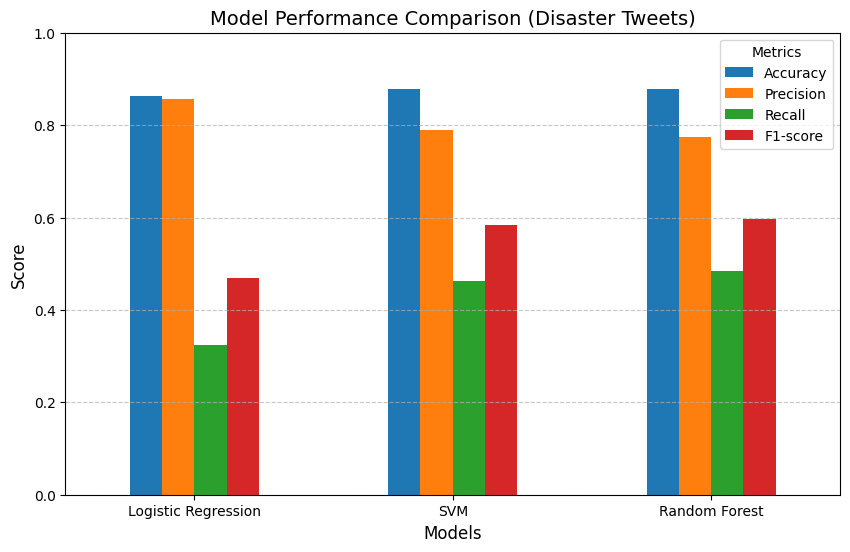

In [42]:
import matplotlib.pyplot as plt
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
results_df = pd.DataFrame(results, index=metrics).T
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison (Disaster Tweets)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
